In [1]:
import skimage.measure as msr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd

In [4]:
# Importing class from wmark.py
from wmark import WaterMark

In [5]:
import glob
import os
from pathlib import Path

In [6]:
# Source Directory
src_folder = 'TestSet/'
# Source Path
src_pth = Path(src_folder).resolve()

In [7]:
# All TIF files in the src_path are now imgs
imgs = src_pth.glob('*.tif')

In [8]:
# Creating empty DataFrames that will fill up during the loop
pandas_dataframe_final_PSNR = pd.DataFrame()
pandas_dataframe_final_SSIM = pd.DataFrame()

for img in imgs:
    
    img_original = WaterMark.imread(img)

    # Attributes: 
        # img - required
        # seed - required
        # max_impact (logarithmic scale) - optional; default = 0.75
        # max_impact (logarithmic scale) - optional; default = 4
        # steps - optional; default = 25
    pandas_dataframe_temp = WaterMark.impactFactor_PSNR_SSIM(img_original, seed = 5)
    
    # Creating temporary DataFrames
    pandas_dataframe_IF = pandas_dataframe_temp['Impact Factor']
    pandas_dataframe_PSNR = pandas_dataframe_temp['PSNR']
    pandas_dataframe_SSIM = pandas_dataframe_temp['SSIM']
    
    # Creating final DataFrames (separated for PSNR and SSIM)
    pandas_dataframe_final_PSNR = pd.concat([pandas_dataframe_final_PSNR, pandas_dataframe_PSNR], axis= 1)
    pandas_dataframe_final_SSIM = pd.concat([pandas_dataframe_final_SSIM, pandas_dataframe_SSIM], axis= 1)
    
    #Print a dot after looping through each image (to keep track of progress)
    print('.')

/Users/zgebac/anaconda3/envs/conda-env_python/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/zgebac/anaconda3/envs/conda-env_python/lib/python3.7/site-packages/skimage/measure/simple_metrics.py:144: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


.
.
.
.
.


In [9]:
# Adding Impact Factor values to PSNR/SSIM DataFrames
pandas_dataframe_final_IF_PSNR = pd.concat([pandas_dataframe_IF, pandas_dataframe_final_PSNR], axis= 1)
pandas_dataframe_final_IF_SSIM = pd.concat([pandas_dataframe_IF, pandas_dataframe_final_SSIM], axis= 1)

In [10]:
# Making Impact Factor index
pandas_dataframe_final_IF_PSNR_index = pandas_dataframe_final_IF_PSNR.set_index('Impact Factor')
pandas_dataframe_final_IF_SSIM_index = pandas_dataframe_final_IF_SSIM.set_index('Impact Factor')

In [11]:
pandas_dataframe_final_IF_PSNR_index

,PSNR,PSNR,PSNR,PSNR,PSNR
Impact Factor,,,,,
5.623413,inf,inf,inf,inf,inf
7.680981,inf,inf,inf,inf,inf
10.491397,76.701214,inf,inf,inf,inf
14.330126,61.117928,85.595224,82.806067,87.896634,inf
19.573418,54.910786,67.164532,66.173560,68.991818,84.077115
26.735194,52.424717,59.600652,58.823168,59.750789,66.709566
36.517413,50.912998,55.830781,54.966818,55.031285,59.415560
49.878877,48.375868,53.358645,52.565180,52.420815,55.537032
68.129207,45.781296,50.911133,50.267391,50.355999,52.977114


In [12]:
pandas_dataframe_final_IF_SSIM_index

,SSIM,SSIM,SSIM,SSIM,SSIM
Impact Factor,,,,,
5.623413,1.000000,1.000000,1.000000,1.000000,1.000000
7.680981,1.000000,1.000000,1.000000,1.000000,1.000000
10.491397,0.999980,1.000000,1.000000,1.000000,1.000000
14.330126,0.999355,1.000000,0.999996,0.999999,1.000000
19.573418,0.998457,0.999994,0.999827,0.999914,0.999998
26.735194,0.998679,0.999976,0.999303,0.999481,0.999882
36.517413,0.998808,0.999935,0.998812,0.999030,0.999571
49.878877,0.997675,0.999812,0.998336,0.998798,0.999349
68.129207,0.996313,0.999608,0.997373,0.998344,0.999105


In [13]:
# Creating DataFrames with mean PSNR/SSIM values
pandas_dataframe_final_PSNR_mean = pandas_dataframe_final_IF_PSNR_index.mean(axis = 1)
pandas_dataframe_final_SSIM_mean = pandas_dataframe_final_IF_SSIM_index.mean(axis = 1)

In [ ]:
pandas_dataframe_final_PSNR_mean

In [ ]:
pandas_dataframe_final_SSIM_mean

Text(0, 73.5, 'For low Impact factor values, PSNR values are very high, but dropping down rapidly.\nWith larger Impact Factor values, PSNR values are still dropping, but not as rapidly.')

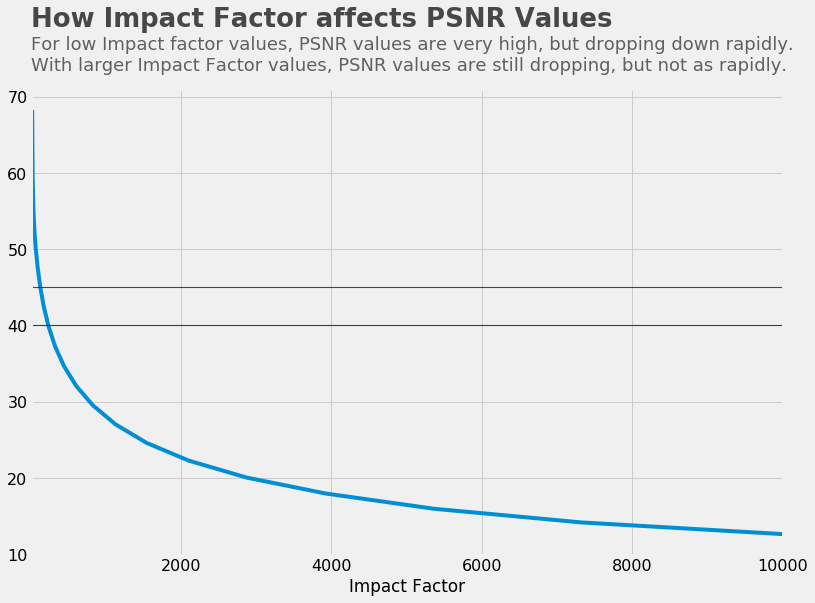

In [14]:
# https://www.dataquest.io/blog/making-538-plots/

style.use('fivethirtyeight')

# Creating Impact Factor / PSNR graph
fte_graph_1 = pandas_dataframe_final_PSNR_mean.plot(x = 'Impact Factor', y = 'PSNR', figsize = (12, 8))
# Setting rules for labeling axes
fte_graph_1.tick_params(axis = 'both', which = 'major', labelsize = 16)

# Creating different lines accross the graph (can be used for important slices of results)
fte_graph_1.axhline(y = 40, color = 'black', linewidth = 1.1, alpha = .7)
fte_graph_1.axhline(y = 45, color = 'black', linewidth = 1.1, alpha = .7)

# Setting visibility of X-label
fte_graph_1.xaxis.label.set_visible(True)


# Title

# Y value is continuous to values on Y-axis. For instance, 
# if the maximum value is 60, the text can begin at 61.

# Alpha indicates text opacity

fte_graph_1.text(x = 0, y = 79.2, s = "How Impact Factor affects PSNR Values",
               fontsize = 26, weight = 'bold', alpha = .7)

# Subtitle
fte_graph_1.text(x = 0, y = 73.5,
               s = "For low Impact factor values, PSNR values are very high, but dropping down rapidly.\nWith larger Impact Factor values, PSNR values are still dropping, but not as rapidly.",
              fontsize = 18, alpha = .6)

Text(0, 1.06, 'For low Impact Factor values, SSIM values stay close do 1,\nbut keep dropping towards zero with larger Impact Factor values.')

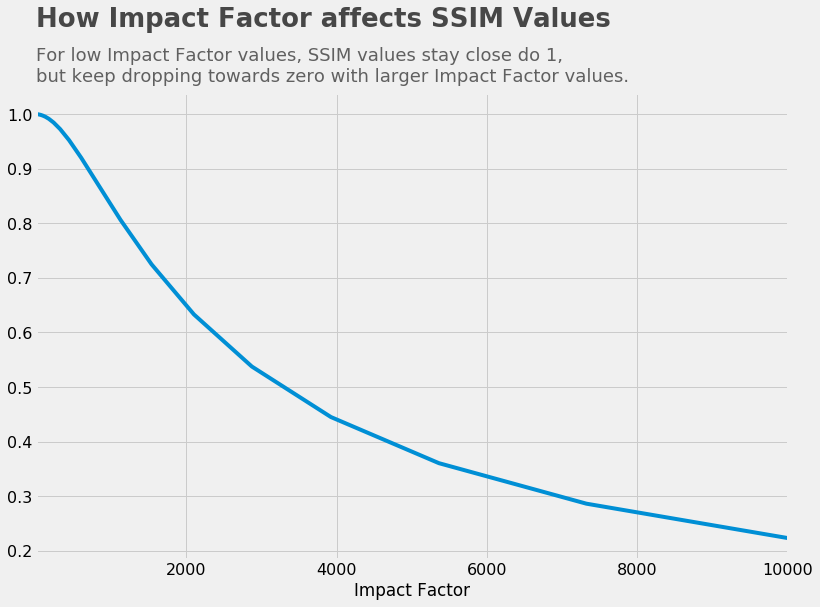

In [15]:
fte_graph_2 = pandas_dataframe_final_SSIM_mean.plot(x = 'Impact Factor', y = 'SSIM', figsize = (12, 8))
fte_graph_2.tick_params(axis = 'both', which = 'major', labelsize = 16)

# Creating different lines accross the graph (can be used for important slices)
# fte_graph_2.axhline(y = 0.5, color = 'black', linewidth = 1.1, alpha = .7)
# fte_graph_2.axhline(y = 1, color = 'black', linewidth = 1.1, alpha = .7)

# Setting visibility of X-label
fte_graph_2.xaxis.label.set_visible(True)

# Title
fte_graph_2.text(x = 0, y = 1.16, s = "How Impact Factor affects SSIM Values",
               fontsize = 26, weight = 'bold', alpha = .7)

# Subtitle
fte_graph_2.text(x = 0, y = 1.06,
               s = "For low Impact Factor values, SSIM values stay close do 1,\nbut keep dropping towards zero with larger Impact Factor values.",
              fontsize = 18, alpha = .6)

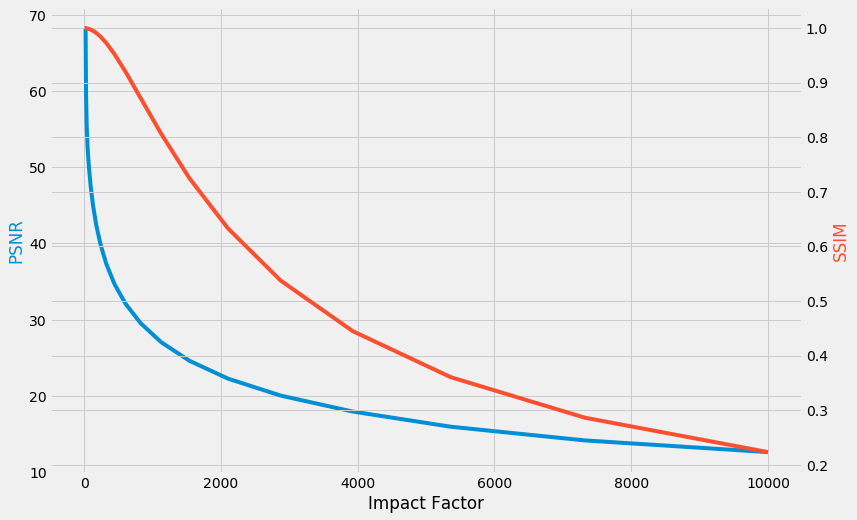

In [16]:
# Colors: https://github.com/matplotlib/matplotlib/blob/38be7aeaaac3691560aeadafe46722dda427ef47/lib/matplotlib/mpl-data/stylelib/fivethirtyeight.mplstyle

plt.style.use('fivethirtyeight')

# Creating graph
fig, ax1 = plt.subplots(figsize=(12,8))

# Setting X-axis and first Y-axis
ax1.set_xlabel('Impact Factor')
ax1.set_ylabel('PSNR', color = '#008fd5')

# Creating a second Y-axis that shares the same X-axis
ax2 = ax1.twinx()  
ax2.set_ylabel('SSIM', color = '#fc4f30')

# Show grid
ax1.grid(True)
ax2.grid(True)

# Setting different colors for each variable
ax1.plot(pandas_dataframe_final_PSNR_mean, color = '#008fd5')
ax2.plot(pandas_dataframe_final_SSIM_mean, color = '#fc4f30')